# OpenMP_en_C.ipynb

In [ ]:
# Verificar la versión de GCC
!gcc --version

gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



## Sin utilizar OpenMP

In [ ]:
%%writefile helloOpenMP.c
#include <stdio.h>
int main( ){
  printf("Hola, te saludo desde el hilo ? de ?");
  return 0;
}

Overwriting helloOpenMP.c


In [ ]:
!gcc helloOpenMP.c -o helloOpenMP
!./helloOpenMP

Hola, te saludo desde el hilo ? de ?

## Incluir la libreria de OpenMP y la Directiva

La cantidad de veces que imprime me indica la cantidad de CPU que detectó automáticamente

In [ ]:
%%writefile helloOpenMP.c
// Se incluye la libreria OpenMP con #include <omp.h>
// Se coloca la directiva pragma omp parallel
#include <stdio.h>
#include <omp.h>

int main( ){
#pragma omp parallel
  {
  printf("Hola, te saludo desde el hilo ? de ?\n");
  }
  return 0;
}

Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?


## Uso de la variable de entorno

In [ ]:
# Se le puede especificar el número de hilos
!OMP_NUM_THREADS=2 ./helloOpenMP

Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?


## Uso de la cláusula

In [ ]:
%%writefile helloOpenMP.c
// Se incluye la libreria OpenMP con #include <omp.h>
// Se coloca la directiva pragma omp parallel, modificada indicándole la cantidad de Hilos que debe usar
#include <stdio.h>
#include <omp.h>

int main( ){
#pragma omp parallel num_threads(4)
  {
  printf("Hola, te saludo desde el hilo ? de ?\n");
  }
  return 0;
}

Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?


## Variable de entorno cuando ya tengo la cláusula

In [ ]:
# Sin importar el número de hilos que yo le pase por la variable de entorno, se tomarán los de la cláusula
!OMP_NUM_THREADS=1 ./helloOpenMP

Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?


In [ ]:
# Sin importar el número de hilos que yo le pase por la variable de entorno, se tomarán los de la cláusula
!OMP_NUM_THREADS=3 ./helloOpenMP

Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?


In [ ]:
# Sin importar el número de hilos que yo le pase por la variable de entorno, se tomarán los de la cláusula
!OMP_NUM_THREADS=6 ./helloOpenMP

Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?


## Identificar a los hilos y conocer los hilos que se ejecutan en una región paralela

Hay no determinismo, es decir los hilos podrán ejecutarse 0,1,2,3 o 0,3,1,2

In [ ]:
%%writefile helloOpenMP.c
// Se incluye la libreria OpenMP con #include <omp.h>
// Se coloca la directiva pragma omp parallel, modificada indicándole la cantidad de Hilos que debe usar
// Identificar a los hilos: omp_get_thread_num();
// Cantidad de hilos en la región paralela:  omp_get_num_threads();
#include <stdio.h>
#include <omp.h>

int main( ){
#pragma omp parallel num_threads(4)
  {
    int my_rank = omp_get_thread_num();
    int num_threads = omp_get_num_threads();
    printf("Hola, te saludo desde el hilo %d de %d\n",my_rank,num_threads);
  }
  return 0;
}


Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

Hola, te saludo desde el hilo 2 de 4
Hola, te saludo desde el hilo 1 de 4
Hola, te saludo desde el hilo 3 de 4
Hola, te saludo desde el hilo 0 de 4




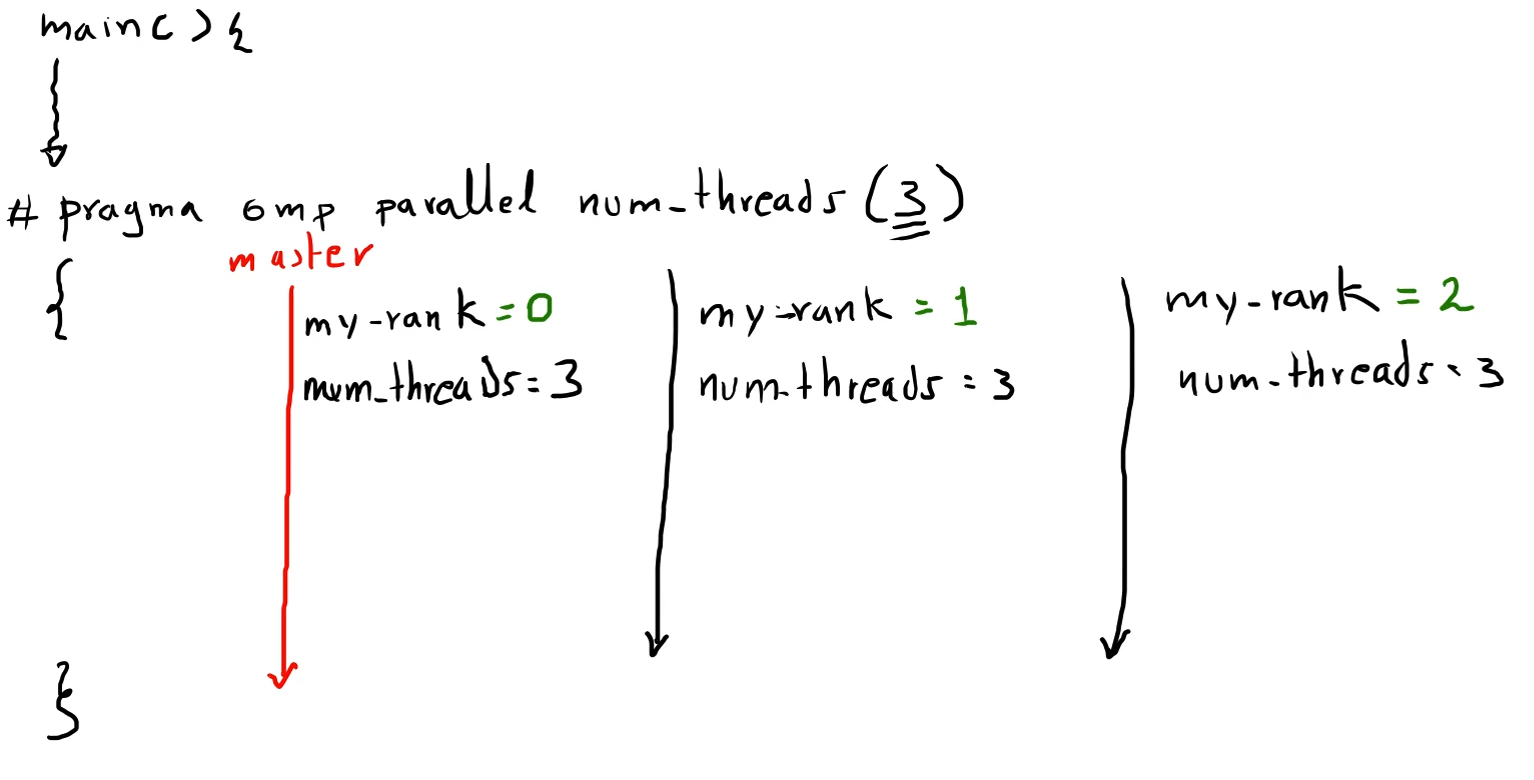

## Tarea "Directiva pragma" profundizar e implementar ejemplos por cada una y otros adicionales

OpenMP es una API que proporciona varias directivas, cláusulas y funciones que se utilizan para la programación paralela en C/C++. A continuación, se presentan algunas de las directivas más comunes utilizadas en OpenMP:

* #pragma omp parallel: esta directiva se utiliza para crear un equipo de hilos que ejecutan una región de código en paralelo.

* #pragma omp for: esta directiva se utiliza para dividir un bucle en varias partes y distribuir las partes entre los hilos del equipo.

* #pragma omp sections: esta directiva se utiliza para dividir una región de código en secciones independientes que se ejecutan en paralelo.

* #pragma omp single: esta directiva se utiliza para especificar una región de código que debe ser ejecutada por un solo hilo.

* #pragma omp master: esta directiva se utiliza para especificar una región de código que debe ser ejecutada solo por el hilo principal.

* #pragma omp task: esta directiva se utiliza para crear una tarea que puede ser ejecutada por cualquier hilo disponible.

* #pragma omp barrier: esta directiva se utiliza para sincronizar los hilos en un punto específico del programa.

* #pragma omp critical: esta directiva se utiliza para especificar una región de código que solo puede ser ejecutada por un hilo a la vez.

* #pragma omp simd: esta directiva se utiliza para habilitar la vectorización de un bucle en paralelo.

In [ ]:
%%writefile helloOpenMP.c
#include <stdio.h>
#include <omp.h>
#include <unistd.h>
int main() {
  //Directiva 1: Crear equipo de hilos con 4 hilos
  #pragma omp parallel num_threads(4)
  {
    printf("Hola, te saludo desde el hilo ? de ?\n");
    sleep(2);
  }
  return 0;
}


Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?
Hola, te saludo desde el hilo ? de ?


In [ ]:
%%writefile helloOpenMP.c
#include <stdio.h>
#include <omp.h>
#include <unistd.h>

int main() {
  int sum = 0;
  int i;

  // Directiva 2: Dividir bucle for en partes y distribuir entre hilos
  #pragma omp for
  for (i = 0; i < 10; i++) {
      sum += i;
      printf("suma = %d, hilo %d de %d\n", sum, omp_get_thread_num(), omp_get_num_threads());
      sleep(1);
  }
  printf("Suma final = %d\n", sum);

  sum = 0;
  #pragma omp parallel for num_threads(4)
  for (i = 0; i < 10; i++) {
      sum += i;
      printf("suma = %d, hilo %d de %d\n", sum, omp_get_thread_num(), omp_get_num_threads());
      sleep(1);
  }
  printf("Suma final = %d\n", sum);

  sum = 0;
  #pragma omp parallel for private(i) shared(sum) num_threads(4)
  for (i = 0; i < 10; i++) {
      sum += i;
      printf("suma = %d, hilo %d de %d\n", sum, omp_get_thread_num(), omp_get_num_threads());
      sleep(1);
  }
  printf("Suma final = %d\n", sum);
sum = 0;
#pragma omp parallel for reduction(+:sum) num_threads(4)
  for (i = 0; i < 10; i++) {
      sum += i;
      printf("suma = %d, hilo %d de %d\n", sum, omp_get_thread_num(), omp_get_num_threads());
      sleep(1);
  }
  printf("Suma final = %d\n", sum);
  return 0;
}

Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

suma = 0, hilo 0 de 4
suma = 6, hilo 2 de 4
suma = 9, hilo 1 de 4
suma = 17, hilo 3 de 4
suma = 26, hilo 3 de 4
suma = 30, hilo 1 de 4
suma = 31, hilo 0 de 4
suma = 38, hilo 2 de 4
suma = 40, hilo 0 de 4
suma = 45, hilo 1 de 4
Suma final = 45


In [ ]:
%%writefile helloOpenMP.c
#include <stdio.h>
#include <omp.h>
#include <unistd.h>

int main() {

  // Directiva 3: Dividir código en secciones independientes
  #pragma omp sections
    {
    #pragma omp section
      {
        // Sección 1
        printf("Hola desde la sección 1, hilo %d de %d\n", omp_get_thread_num(), omp_get_num_threads());
        sleep(2);
      }

    #pragma omp section
      {
        // Sección 2
        printf("Hola desde la sección 2, hilo %d de %d\n", omp_get_thread_num(), omp_get_num_threads());
        sleep(2);
      }
    }

#pragma omp parallel sections num_threads(2)
    {
    #pragma omp section
      {
        // Sección 1
        printf("Hola desde la sección 1, hilo %d de %d\n", omp_get_thread_num(), omp_get_num_threads());
        sleep(2);
      }

    #pragma omp section
      {
        // Sección 2
        printf("Hola desde la sección 2, hilo %d de %d\n", omp_get_thread_num(), omp_get_num_threads());
        sleep(2);
      }
    }
  return 0;
}

Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

Hola desde la sección 1, hilo 0 de 1
Hola desde la sección 2, hilo 0 de 1
Hola desde la sección 1, hilo 0 de 2
Hola desde la sección 2, hilo 1 de 2


In [ ]:
%%writefile helloOpenMP.c
#include <stdio.h>
#include <omp.h>
#include <unistd.h>

int main() {
  // Directiva 4: Ejecutar región de código con un solo hilo
  #pragma omp single
    {
      printf("Esta es una región de código ejecutada por un solo hilo, hilo %d\n", omp_get_thread_num());
    }

  // Directiva 5: Ejecutar región de código solo por el hilo principal
  #pragma omp master
    {
      printf("Esta es una región de código ejecutada solo por el hilo principal, hilo %d\n", omp_get_thread_num());
    }

  // Directiva 6: Crear tarea que puede ser ejecutada por cualquier hilo disponible
  #pragma omp task
    {
      printf("Hola desde una tarea, hilo %d de %d\n", omp_get_thread_num(), omp_get_num_threads());
    }
  // Directiva 7: Sincronizar hilos en un punto específico del programa
  #pragma omp barrier

  // Directiva 8: Ejecutar región de código de manera crítica (solo un hilo a la vez)
  #pragma omp critical
    {
      printf("Hola desde una región crítica, hilo %d de %d\n", omp_get_thread_num(), omp_get_num_threads());
    }
  return 0;
}

Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

Esta es una región de código ejecutada por un solo hilo, hilo 0
Esta es una región de código ejecutada solo por el hilo principal, hilo 0
Hola desde una tarea, hilo 0 de 1
Hola desde una región crítica, hilo 0 de 1


In [ ]:
%%writefile helloOpenMP.c
#include <stdio.h>
#include <omp.h>
#include <unistd.h>
#include <time.h>

int main() {
  long long int sum = 0;//probar con int
  int i;
  int N=1000000000;//probar con 1000000000


  // Directiva 9: Habilitar vectorización de un bucle en paralelo
  sum=0;
  double start_time = omp_get_wtime();
  #pragma omp simd
  for (i = 0; i < N; i++) {
      sum += i;
      //printf("suma = %d, hilo %d de %d\n", sum, omp_get_thread_num(), omp_get_num_threads());
    }
  printf("La suma es %lld\n", sum);
  double end_time = omp_get_wtime();
  printf("Tiempo con vectorizacion de la operación: %lf seconds\n", end_time - start_time);

  sum=0;
  start_time = omp_get_wtime();
  #pragma omp parallel for num_threads(10)
  for (i = 0; i < N; i++) {
    sum += i;
     //printf("suma = %d, hilo %d de %d\n", sum, omp_get_thread_num(), omp_get_num_threads());
  }
  printf("La suma es %lld\n", sum);
  end_time = omp_get_wtime();
  printf("Tiempo con paralelización del ciclo: %lf seconds\n", end_time - start_time);

  sum=0;
  start_time = omp_get_wtime();
  #pragma omp parallel for reduction(+:sum) num_threads(10)
  for (i = 0; i < N; i++) {
    sum += i;
     //printf("suma = %d, hilo %d de %d\n", sum, omp_get_thread_num(), omp_get_num_threads());
  }
  printf("La suma es %lld\n", sum);
  end_time = omp_get_wtime();
  printf("Tiempo con paralelización de la operación: %lf seconds\n", end_time - start_time);

  return 0;
}


Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

La suma es 499999999500000000
Tiempo con vectorizacion de la operación: 2.587611 seconds
La suma es 58230323027516629
Tiempo con paralelización del ciclo: 3.636306 seconds
La suma es 499999999500000000
Tiempo con paralelización de la operación: 0.371616 seconds


## Ejemplo, suma, resta y multiplicación de matrices utilizando OpenMP

In [ ]:
%%writefile helloOpenMP.c
#include <stdio.h>
#include <omp.h>

#define N 10

int main()
{
    int i, j, k;
    int A[N][N], B[N][N], C[N][N], D[N][N], E[N][N];

    // Inicializamos las matrices A y B
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            A[i][j] = i + j;
            B[i][j] = i - j;
        }
    }

    // Mostramos la matriz A
    printf("Matriz A:\n");
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            printf("%d\t", A[i][j]);
        }
        printf("\n");
    }

    // Mostramos la matriz B
    printf("Matriz B:\n");
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            printf("%d\t", B[i][j]);
        }
        printf("\n");
    }

    // Sumamos las matrices A y B
    #pragma omp parallel for private(i, j) shared(A, B, D)
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            D[i][j] = A[i][j] + B[i][j];
        }
    }

    // Mostramos la matriz resultado de la suma
    printf("Matriz D (A+B):\n");
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            printf("%d\t", D[i][j]);
        }
        printf("\n");
    }

    // Restamos las matrices A y B
    #pragma omp parallel for private(i, j) shared(A, B, E)
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            E[i][j] = A[i][j] - B[i][j];
        }
    }

    // Mostramos la matriz resultado de la resta
    printf("Matriz E (A-B):\n");
        for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            printf("%d\t", E[i][j]);
        }
        printf("\n");
    }

    // Multiplicamos las matrices A y B usando OpenMP
    #pragma omp parallel for private(i, j, k) shared(A, B, C)
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            C[i][j] = 0;
            for (k = 0; k < N; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }

    // Mostramos la matriz resultado de la multiplicación
    printf("Matriz C (AxB):\n");
    for (i = 0; i < N; i++) {
        for (j = 0; j < N; j++) {
            printf("%d\t", C[i][j]);
        }
        printf("\n");
    }

    return 0;
}

Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

Matriz A:
0	1	2	3	4	5	6	7	8	9	
1	2	3	4	5	6	7	8	9	10	
2	3	4	5	6	7	8	9	10	11	
3	4	5	6	7	8	9	10	11	12	
4	5	6	7	8	9	10	11	12	13	
5	6	7	8	9	10	11	12	13	14	
6	7	8	9	10	11	12	13	14	15	
7	8	9	10	11	12	13	14	15	16	
8	9	10	11	12	13	14	15	16	17	
9	10	11	12	13	14	15	16	17	18	
Matriz B:
0	-1	-2	-3	-4	-5	-6	-7	-8	-9	
1	0	-1	-2	-3	-4	-5	-6	-7	-8	
2	1	0	-1	-2	-3	-4	-5	-6	-7	
3	2	1	0	-1	-2	-3	-4	-5	-6	
4	3	2	1	0	-1	-2	-3	-4	-5	
5	4	3	2	1	0	-1	-2	-3	-4	
6	5	4	3	2	1	0	-1	-2	-3	
7	6	5	4	3	2	1	0	-1	-2	
8	7	6	5	4	3	2	1	0	-1	
9	8	7	6	5	4	3	2	1	0	
Matriz D (A+B):
0	0	0	0	0	0	0	0	0	0	
2	2	2	2	2	2	2	2	2	2	
4	4	4	4	4	4	4	4	4	4	
6	6	6	6	6	6	6	6	6	6	
8	8	8	8	8	8	8	8	8	8	
10	10	10	10	10	10	10	10	10	10	
12	12	12	12	12	12	12	12	12	12	
14	14	14	14	14	14	14	14	14	14	
16	16	16	16	16	16	16	16	16	16	
18	18	18	18	18	18	18	18	18	18	
Matriz E (A-B):
0	2	4	6	8	10	12	14	16	18	
0	2	4	6	8	10	12	14	16	18	
0	2	4	6	8	10	12	14	16	18	
0	2	4	6	8	10	12	14	16	18	
0	2	4	6	8	10	12	14	16	18	
0	2	4	6	8	10	12	14	16	18	
0	2	4	6	8	10	12	14	16	

## Comparando los tiempos

In [ ]:
%%writefile helloOpenMP.c
#include <stdio.h>
#include <stdlib.h>
#include <omp.h>
#include <time.h>

#define N 100000000

int main() {
  int* arr = (int*)malloc(sizeof(int) * N);
  int sum = 0;
  int i;

  srand(time(NULL));

  for (i = 0; i < N; i++) {
    arr[i] = rand() % 10;
  }

  double start_time = omp_get_wtime();

  for (i = 0; i < N; i++) {
    sum += arr[i];
  }

  double end_time = omp_get_wtime();

  printf("The sum is %d\n", sum);
  printf("Time taken without pragma: %lf seconds\n", end_time - start_time);
  double tiempoSecuencial = end_time - start_time;
  sum = 0;

  start_time = omp_get_wtime();

  #pragma omp parallel for reduction(+:sum) num_threads(10)
  for (i = 0; i < N; i++) {
    sum += arr[i];
  }

  end_time = omp_get_wtime();

  printf("The sum is %d\n", sum);
  printf("Time taken with pragma: %lf seconds\n", end_time - start_time);
  double tiempoParalelo = end_time - start_time;
  free(arr);
  printf("Speedup: %lf\n", tiempoSecuencial / tiempoParalelo);
  return 0;
}


Overwriting helloOpenMP.c


In [ ]:
# Se le debe indicar con -fopenmp para que compile respecto a la libreria OpenMP
!gcc helloOpenMP.c -o helloOpenMP -fopenmp
!./helloOpenMP

The sum is 450021630
Time taken without pragma: 0.201146 seconds
The sum is 450021630
Time taken with pragma: 0.034347 seconds
Speedup: 5.856327


# Mini curso de C (recurso de apoyo)

### Condicionales en C

In [ ]:
# Uso de if, else, else if
%%writefile welcome.c

#include <stdio.h>
int main( ){
  int myNum = 10; // Is this a positive or negative number?

  if (myNum > 0) {
    printf("The value is a positive number.");
  } else if (myNum < 0) {
    printf("The value is a negative number.");
  } else {
    printf("The value is 0.");
  }
  return 0;
}

Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

The value is a positive number.

In [ ]:
# Uso de switch
%%writefile welcome.c
#include <stdio.h>
int main( ){
  int day = 4;

  switch (day) {
    case 1:
      printf("Monday");
      break;
    case 2:
      printf("Tuesday");
      break;
    case 3:
      printf("Wednesday");
      break;
    case 4:
      printf("Thursday");
      break;
    case 5:
      printf("Friday");
      break;
    case 6:
      printf("Saturday");
      break;
    case 7:
      printf("Sunday");
      break;
  }
  return 0;
}


Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

Thursday

### Ciclos en C

In [ ]:
# Uso de While
%%writefile welcome.c
#include <stdio.h>
int main( ){
  int i = 0;

  while (i < 5) {
    printf("%d\n", i);
    i++;
  }
  return 0;
}


Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

0
1
2
3
4


In [ ]:
# Uso de do while
%%writefile welcome.c
#include <stdio.h>
int main( ){

  int i = 0;

  do {
    printf("%d\n", i);
    i++;
  }
  while (i < 5);

  return 0;
}


Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

0
1
2
3
4


In [ ]:
# Uso de for
%%writefile welcome.c
#include <stdio.h>
int main( ){

  int i;

  for (i = 0; i < 5; i++) {
    printf("%d\n", i);
  }

  return 0;
}

Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

0
1
2
3
4


In [ ]:
# Uso de for anidado
%%writefile welcome.c
#include <stdio.h>
int main( ){

  int i, j;

  // Outer loop
  for (i = 1; i <= 2; ++i) {
    printf("Outer: %d\n", i);  // Executes 2 times

    // Inner loop
    for (j = 1; j <= 3; ++j) {
      printf(" Inner: %d\n", j);  // Executes 6 times (2 * 3)
    }
  }

  return 0;
}


Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

Outer: 1
 Inner: 1
 Inner: 2
 Inner: 3
Outer: 2
 Inner: 1
 Inner: 2
 Inner: 3


In [ ]:
# Uso de break en un while
%%writefile welcome.c
#include <stdio.h>
int main( ){

  int i = 0;

  while (i < 10) {
    if (i == 4) {
      break;
    }
    printf("%d\n", i);
    i++;
  }

  return 0;
}


Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

0
1
2
3


### Funciones en C

In [ ]:
# Crear una función y utilizarla
%%writefile welcome.c
#include <stdio.h>

void myFunction() {
  printf("I just got executed!\n");
}

int main( ){
  myFunction(); // Llamar a la función
  myFunction(); // Llamar a la función por segunda vez
  return 0;
}


Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

I just got executed!
I just got executed!


In [ ]:
# Crear una función con entrada de Multiples parámetros y utilizarla
%%writefile welcome.c
#include <stdio.h>

void myFunction(char name[], int age) {
  printf("Hello %s. You are %d years old.\n", name, age);
}

int main() {
  myFunction("Liam", 3);
  myFunction("Jenny", 14);
  myFunction("Anja", 30);
  return 0;
}

Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

Hello Liam. You are 3 years old.
Hello Jenny. You are 14 years old.
Hello Anja. You are 30 years old.


In [ ]:
# Crear una función que Retorna un resultado y utilizarla
%%writefile welcome.c
#include <stdio.h>

int myFunction(int x) {
  return 5 + x;
}

int main() {
  printf("Result is: %d", myFunction(3));
  return 0;
}

Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

Result is: 8

### Matrices en C

In [ ]:
# Crear un Array 1D (Vector) y recorrerlo usando un for
%%writefile welcome.c
#include <stdio.h>

int main() {
  int myNumbers[] = {25, 50, 75, 100};
  int i;

  for (i = 0; i < 4; i++) {
    printf("%d\n", myNumbers[i]);
  }
  return 0;
}


Overwriting welcome.c


In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

25
50
75
100


In [ ]:
# Crear un Array 2D (Matriz) y recorrerla usando un for
%%writefile welcome.c
#include <stdio.h>

int main() {
  int matrix[2][3] = { {1, 4, 2}, {3, 6, 8} };

  int i, j;
  for (i = 0; i < 2; i++) {
    for (j = 0; j < 3; j++) {
      printf("%d\n", matrix[i][j]);
    }
  }
  return 0;
}


Overwriting welcome.c


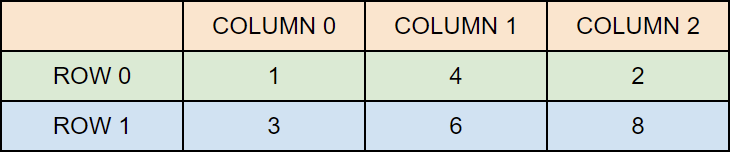

In [ ]:
!gcc welcome.c -o welcome

In [ ]:
!./welcome

1
4
2
3
6
8
